<a href="https://colab.research.google.com/github/liamhall64/Habitable-Exomoons/blob/main/Detectability_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytransit celerite emcee corner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.0/308.0 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.1/698.1 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.5 MB/s eta 0:00:00


In [8]:
from pytransit import QuadraticModel
from pytransit import UniformModel
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const

#Orbital Simulations
######Randomising the angle at which the Moon is observed around the Earth - known as realisation

In [3]:
def barycentre(Mp, Mm, dpm, moon_period):
  dp = dpm/(1+(Mp/Mm)) # DIST BARYCENTRE TO PLANET
  dm = dpm/(1+(Mm/Mp)) # DIST BARYCENTRE TO MOON
  print(f'Planet-barycentre distance = {dp:.3f}\nMoon-barycentre distance = {dm:.3f}')
  return(dp, dm)

In [48]:
# PARAMETERS
Mp = 1*const.M_earth
Mm = 0.0123*const.M_earth
dpm = 0.3844e9*u.m
moon_period = 27.322*u.day
P = 1*u.year
P = P.to(u.day)

dp, dm = barycentre(Mp, Mm, dpm, moon_period)

Planet-barycentre distance = 4670670.750 m
Moon-barycentre distance = 379729329.250 m


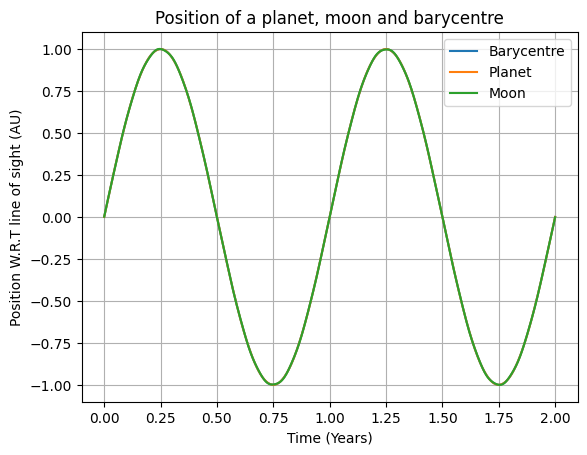


Starting angle of planet and moon = (<Quantity 222.93580192 deg>, <Quantity 402.93580192 deg>)
Angle difference = -180 deg


In [49]:
# HOW MANY TRANSITS YOU WANT TO OBSERVE
t = np.linspace(0, 2*P, 1000)

# BARYCENTRE
ab = 1*const.au # SEPARATION
Pb = P.to(u.s)  # PERIOD
wb = (2*np.pi/Pb) *u.rad # ANGULAR FREQ
alphab = wb*t
xb = ab*np.sin(alphab)

angle = np.random.uniform(0, 2*np.pi)*u.rad

# PLANET
wp = 2*np.pi/moon_period *u.rad
alphap = wp*t + angle
xp = dp * np.sin(alphap) + xb

# MOON
wm = 2*np.pi/moon_period *u.rad
alpham = wm*t + np.pi*u.rad + angle
xm = dm*np.sin(alpham) + xb

plt.plot(t/P, xb/ab.to(u.m), label = 'Barycentre')
plt.plot(t/P, xp/ab.to(u.m), label = 'Planet')
plt.plot(t/P, xm/ab.to(u.m), label = 'Moon')

plt.title('Position of a planet, moon and barycentre')
plt.xlabel('Time (Years)')
plt.ylabel('Position W.R.T line of sight (AU)')
plt.grid(True)
plt.legend()

#plt.xlim(-0.1, 2.1)
plt.show()

# TEST TO SEE IF THE ANGLES ARE RANDOMISED
i = 0 # RANDOM VALUE TO TEST
alphap[i], alpham[i]
a = alphap[i]-alpham[i]
print(f'\nStarting angle of planet and moon = {alphap[i].to(u.deg), alpham[i].to(u.deg)}\nAngle difference = {a.to(u.deg):.0f}')

#TTV calculations
######Using the previous values of angles to calculate the TTVs for moon and planet

Velocity of system around star = 29785.254 m / s


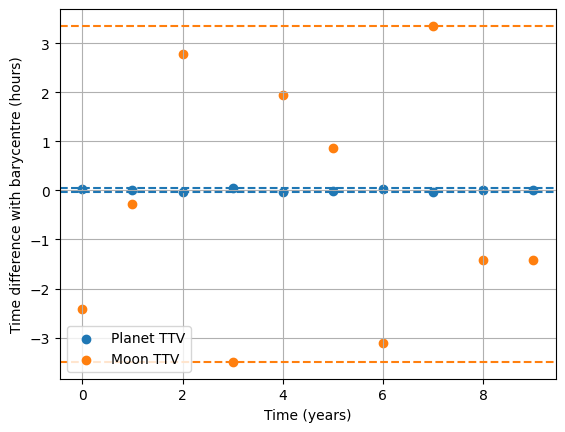

Planet TTV = 106.817 s
Moon TTV = -8684.279 s


In [50]:
N = 10 # NUMBER OF TRANSITS
t = np.arange(0,N*P.value,P.value)*P.unit # TIME

#######################
alphab = wb*t
xb = ab*np.sin(alphab)
#angle = np.random.uniform(0, 2*np.pi)*u.rad
# PLANET
wp = 2*np.pi/moon_period *u.rad
alphap = wp*t + angle
xp = dp * np.sin(alphap) + xb
# MOON
wm = 2*np.pi/moon_period *u.rad
alpham = wm*t + np.pi*u.rad + angle
xm = dm*np.sin(alpham) + xb
#######################

diffp = xb - xp
diffm = xb - xm

vb = (2*np.pi*ab)/P.to(u.s) # BARYCENTRE VELOCITY
print(f'Velocity of system around star = {vb:.3f}')

ttvp = diffp/vb
ttvm = diffm/vb

maxp = np.max(ttvp).to(u.h)
minp = np.min(ttvp).to(u.h)

maxm = np.max(ttvm).to(u.h)
minm = np.min(ttvm).to(u.h)


plt.scatter(t/P, ttvp.to(u.h), label = 'Planet TTV')
plt.scatter(t/P, ttvm.to(u.h), label = 'Moon TTV')

plt.axhline(y = maxp.value, linestyle = 'dashed', color = 'tab:blue')
plt.axhline(y = minp.value, linestyle = 'dashed', color = 'tab:blue')
plt.axhline(y = maxm.value, linestyle = 'dashed', color = 'tab:orange')
plt.axhline(y = minm.value, linestyle = 'dashed', color = 'tab:orange')

plt.xlabel('Time (years)')
plt.ylabel('Time difference with barycentre (hours)')
plt.grid()
plt.legend()
plt.show()
print(f'Planet TTV = {ttvp[0]:.3f}\nMoon TTV = {ttvm[0]:.3f}')

#Light curve simulations
######

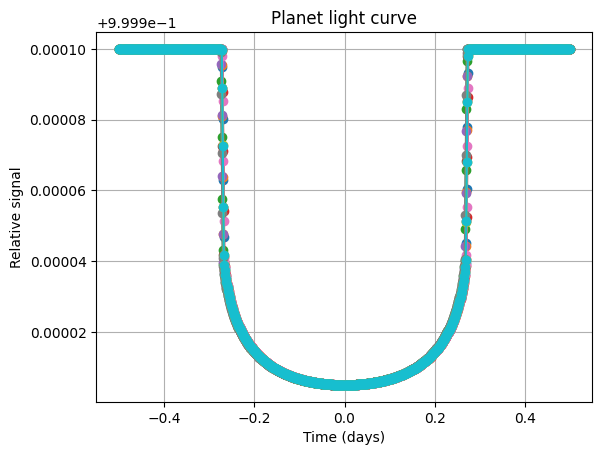

In [52]:
ttvp = ttvp.to(u.day)
# SWAPPED THE t0 FOR ttvp FOR THE TIME OF INFERIOR CONJUNCTION IN DAYS TO RUN IN A LOOP TO GET MULTIPLE LIGHT CURVES
per = 365.25                         #orbital period in days
rp_rs = const.R_earth/const.R_sun        #planet radius / stellar radius ratio
ars =  const.au/const.R_sun              #semi-major axis / stellar radius ratio
inc =  (90*u.deg).to(u.rad).value    #orbital inclination (in radians)
ecc = 0.                             #eccentricity
w = (90*u.deg).to(u.rad).value       #longitude of periastron (in radians)
gamma = [0.231, 0.226]                 #limb darkening coefficients [u1, u2]

texp = 100*u.s.to(u.day)             # the exposure time : we convert seconds to days
t = np.arange(-0.5, 0.5, texp)       # new timegrid #note we use np.arange rather than np.linspace (DAYS) MANDEL AND........
tm = QuadraticModel()                # a model that uses two limb-darkening coefficients
tm.set_data(t)

#plt.figure('lcEarth')
lc_planet = []
for i in range(len(ttvp)):
  lc_planet.append(tm.evaluate(k=rp_rs, ldc=gamma, t0=ttvp[i], p=per, a=ars, i=inc, e=ecc, w=w))
  plt.plot(t, lc_planet[i], '-o')
plt.grid(True)
plt.title('Planet light curve')
plt.xlabel('Time (days)')
plt.ylabel('Relative signal')
plt.show()

In [30]:
def planck(wl, T):
  a = np.float64(1.191042768e8)*u.um**5 *u.W/ u.m**2 /u.sr/u.um
  b = np.float64(14387.7516)*1*u.um * 1*u.K
  try:
    x = b/(wl*T)
    bb = a/wl**5 / (np.exp(x) - 1.0)
  except ArithmeticError:
    bb = np.zeros(np.size(wl))
  return bb

s_lum, s_rad = 1*const.L_sun, 1*const.R_sun              # STELLAR VALUES
T_s = (s_lum/(4*np.pi*s_rad**2*const.sigma_sb))**0.25    # TEMP-LUMINOSITY RELATIONSHIP

wl = np.linspace(0.6, 5.3, 1000)*u.um                    # JWST NIRSPEC PRISM WAVELENGTH RANGE
wl_full = np.linspace(0,6, 1000)*u.um
BB_flux = np.pi*u.sr*planck(wl,T_s)                      # FLUX DENSITY - W/M^2/MICRONS
BB_flux_full = np.pi*u.sr*planck(wl_full,T_s)
'''
plt.figure('BB flux of host star')
#plt.figure(figsize=(12, 6))
plt.plot(wl_full,BB_flux_full,'--', label = 'BB flux of star')
plt.plot(wl,BB_flux,label = 'BB flux in JWST range')
plt.title(f'Blackbody radiation flux for star with T = {T_s:.0f} and observation range')
plt.xlabel('Wavelength ($\mu m$)'); plt.ylabel('Flux (W/m$^2$/$\mu m$)')
plt.legend()
plt.grid()
plt.show();
#'''
print('Done')

Done


/usr/local/lib/python3.10/dist-packages/astropy/units/quantity.py:671: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [31]:
R_s = 1*u.Rsun.to(u.m) # host star radius in Rsun (code converts this to m)
d = 10*u.pc.to(u.m) # distance to star in pc (code converts this to m)

Flux = BB_flux*(R_s/d)**2

D = 6.5*u.m; Atel = np.pi*(D/2)**2 # APERTURE OF SPECIFIC TELESCOPE
trans = 0.5; QE = 0.8 # QUANTUM EFFICIENCY
Power_per_micron = Flux*Atel*trans*QE # WATTS / MICRON
Power = Power_per_micron*np.gradient(wl) # WATTS

Photons_per_second = Power/(const.h*const.c/wl.to(u.m)) # CONVERT WATTS TO PHOTONS
Photons_per_second = np.sum(Photons_per_second).value*1/u.s # TOTAL ELECTRONS PER SECOND

exposure_time = 100*u.s # GENRALISED EXPOSURE
Electrons = (Photons_per_second*exposure_time).value
std = Electrons**0.5

Noise = Electrons**0.5 # ASSUMING A NOISE LIMITED INSTRUMENT
Noise = np.random.normal(0, Noise, len(lc_Earth[0]))

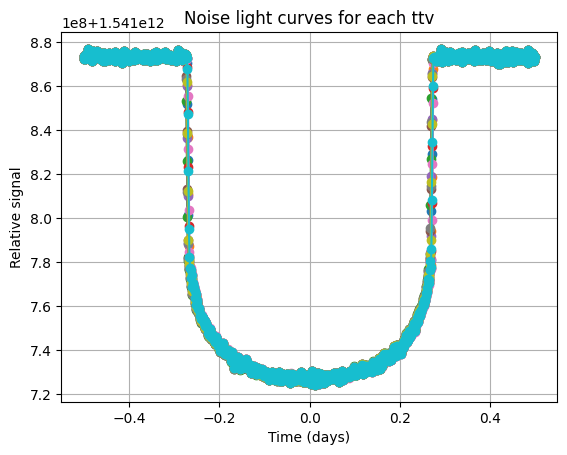

In [32]:
for i in range(len(lc_planet)):
  lc = lc_planet[i]*Electrons
  lc = lc + Noise
  plt.plot(t, lc, '-o')

plt.grid()
plt.title('Noise light curves for each ttv')
plt.ylabel('Relative signal')
plt.xlabel('Time (days)')
plt.show()


Fitted Rp/Rs 0.009162912571910984 Actual Rp/Rs 0.009167888457668536
Fitted S 1541873392229.8643 Actual S 1541873399520.7236
Fitted t0 0.001434873958843862 Actual t0 [ 0.00049862  0.00094693 -0.00178065  0.00146387 -0.00020126 -0.00119138
  0.00181426 -0.00126492 -0.00010171  0.00140262] d


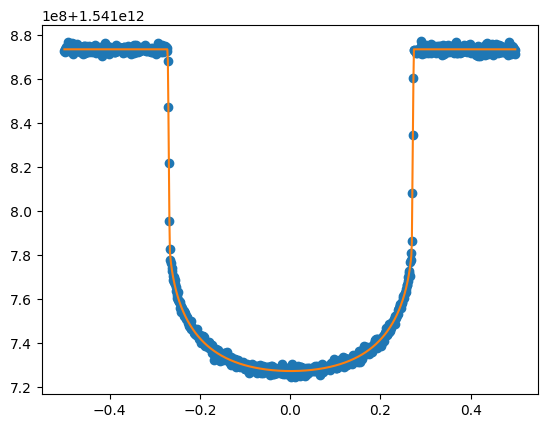

In [33]:
def chi_squared(X, lc, Noise):
    rp_rs = X[0]
    S = X[1]
    t_0 = X[2]
    model =tm.evaluate(k=rp_rs, ldc=gamma, t0=t_0, p=per, a=ars, i=inc, e=ecc, w=w) *S
    return np.sum(((model-lc))**2/Noise**2)

t0 = ttvp
data_lc = lc
S= Electrons

fit_init = [((lc.max()-lc.min())/ lc.max())**0.5, np.mean(lc[0:40]), t0.value[0]+np.random.normal(0,0.001)] # these are initial guesses - we'll cheat a bit by putting in the known values but you can try starting with different initial values too
# Access the first element of t0.value to ensure it's a scalar
bounds =((rp_rs*0.99,rp_rs*1.1), (S*0.99,S*1.1), (-0.01,0.01)) # the bounds over which the algorithm will vary the parameters
# Use std instead of Noise
fit  = minimize(chi_squared, fit_init, args=(data_lc, std), method='Nelder-Mead', jac=None, hess=None, hessp=None, bounds=bounds, constraints=(), tol=None, callback=None, options=None)
final_fit = [fit['x'][0], fit['x'][1], fit['x'][2]]
print ('Fitted Rp/Rs', final_fit[0], 'Actual Rp/Rs', rp_rs)
print ('Fitted S', final_fit[1], 'Actual S', S)
print ('Fitted t0', final_fit[2], 'Actual t0', t0)

model_fit = tm.evaluate(k=fit['x'][0], ldc=gamma, t0=fit['x'][2], p=per, a=ars, i=inc, e=ecc, w=w) *fit['x'][1]

plt.figure('lc')
plt.plot(t,data_lc, 'o')
plt.plot(t,model_fit, '-')
plt.show();

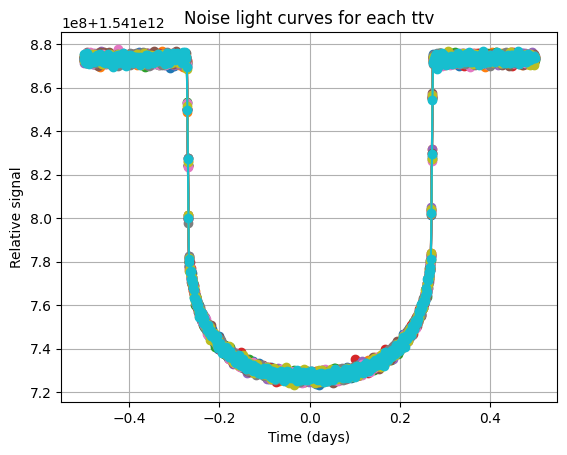

In [34]:
t0_list = []
observations = N
for i in range(observations):
  Noise = Electrons**0.5 # ASSUMING A NOISE LIMITED INSTRUMENT
  Noise = (np.random.normal(0, Noise, len(lc_planet[0])))

  lc = lc_planet[0]*Electrons
  lc = lc + Noise
  plt.plot(t, lc, '-o')

  t0 = ttvp
  data_lc = lc
  S = Electrons

  fit_init = [((lc.max()-lc.min())/ lc.max())**0.5, np.mean(lc[0:40]), t0.value[0]+np.random.normal(0,0.001)] # these are initial guesses - we'll cheat a bit by putting in the known values but you can try starting with different initial values too
  # Access the first element of t0.value to ensure it's a scalar
  bounds =((rp_rs*0.99,rp_rs*1.1), (S*0.99,S*1.1), (-0.01,0.01)) # the bounds over which the algorithm will vary the parameters
  # Use std instead of Noise
  fit  = minimize(chi_squared, fit_init, args=(data_lc, std), method='Nelder-Mead', jac=None, hess=None, hessp=None, bounds=bounds, constraints=(), tol=None, callback=None, options=None)
  final_fit = [fit['x'][0], fit['x'][1], fit['x'][2]]
  #print ('Fitted Rp/Rs', final_fit[0], 'Actual Rp/Rs', rp_rs_Earth)
  #print ('Fitted S', final_fit[1], 'Actual S', S)
  #print ('Fitted t0', final_fit[2], 'Actual t0', t0)

  model_fit = tm.evaluate(k=fit['x'][0], ldc=gamma, t0=fit['x'][2], p=per, a=ars, i=inc, e=ecc, w=w) *fit['x'][1]

  #plt.figure('lc')
  #plt.plot(t,data_lc, 'o')
  #plt.plot(t,model_fit, '-')

  t0_list.append(final_fit[2])

plt.grid()
plt.title('Noise light curves for each ttv')
plt.ylabel('Relative signal')
plt.xlabel('Time (days)')
plt.show()

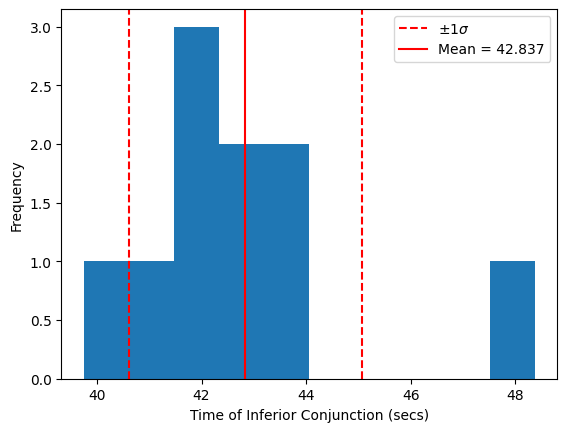

In [36]:
t0_list_sec = [t*u.day.to(u.s) for t in t0_list]
std = np.std(t0_list_sec)
mean = np.mean(t0_list_sec)

# EXPECTED - ACTUAL / ACTUAL
error = (final_fit[2] - t0_list)/t0_list

plt.hist(t0_list_sec)
plt.axvline(mean + std, c = 'r', linestyle = '--')
plt.axvline(mean - std, c = 'r', linestyle = '--', label = '$\pm 1 \sigma$')
plt.axvline(np.mean(t0_list_sec), c = 'r', label = f'Mean = {np.mean(t0_list_sec):.3f}')

plt.xlabel('Time of Inferior Conjunction (secs)')
plt.ylabel('Frequency')
plt.legend()